In [45]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import optimize
from scipy import stats
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['font.family'] = 'IPAexGothic'

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす
import pickle

f = open("mean_vec_list.binaryfile",'rb')
mean_vec_list = pickle.load(f)

In [46]:
import gensim

model = gensim.models.Word2Vec.load("latest-ja-word2vec-gensim-model/word2vec.gensim.model")

In [141]:
# 入力単語

imput_word_list = ['日本', "東京", "アメリカ"]

In [142]:
result_vec_list  = []

for w in imput_word_list:

    w_to_v = model.wv[w]

    for mean_vec in mean_vec_list:
        result_vec_plus = w_to_v - mean_vec 
        result_vec_minus =   w_to_v + mean_vec 
    
        result_vec_list.append(result_vec_plus)
        result_vec_list.append(result_vec_minus)

In [143]:
len(result_vec_list)

1956

# 計算方法

1. 入力単語に対して, 関係ベクトルを足し算and引き算=>推定用のベクトルを算出
2. 推定ベクトルと単語ベクトルで類似度が高いやつをそれぞれ3個出す
2. 出力単語の頻度
2. 

In [144]:
# 関係ベクトルと類似度が高い単語をn個上位表示

import numpy as np

output_word_list = []
max_n = 2

for vec in result_vec_list:
    most_similar = np.array(list(model.wv.most_similar([vec], [], max_n)))
    
    output_word_list.extend(most_similar[:,0].tolist())

In [145]:
#インプットした単語と同じ単語は除去

for imput_word in imput_word_list:
    output_word_list = [output_word for output_word in output_word_list if output_word != imput_word]
    print(len(output_word_list))

3639
3450
3200


In [146]:
len(output_word_list)

3200

In [147]:
# 登録済固有名詞リスト

f = open("koyuu_noun_list.binaryfile",'rb')
noun_list = pickle.load(f)

In [148]:
len(noun_list)

90128

In [159]:
noun_list

['定国',
 'デスゲーム',
 'イボガイン',
 'ヅダ',
 'スリーピースバンド',
 '道前平野',
 'マッキンリー',
 'トリックテイキングゲーム',
 'シュテンネス',
 'ゲシェネン',
 'クマン',
 'ソンバトヘイ',
 'ティグレ',
 'グンドバト',
 '真柴',
 '濫',
 'ボヤ',
 '味津三',
 'ゴロフキン',
 'ディルバート',
 'ニコラ・ラリーニ',
 'アフリカ統一機構',
 '箱田',
 'セルゲ',
 'ロイヤル・カリビアン・インターナショナル',
 'グレガリナ',
 'キルケネス',
 'ソーンダイク',
 '紀見峠',
 'ナブコ',
 'ルツボ',
 'クロゾン',
 '近代文学館',
 '體育',
 'フェーマルン',
 'ラッシュハンターズ',
 'デイリー・ミラー',
 '古屋敷',
 'ラビリンチュラ',
 '延暦寺',
 '布施',
 'レプリケーター',
 '高松',
 'ブラックキング',
 '泰夫',
 '元寺',
 'ルース',
 'グレナダ',
 'ホセア',
 'ペネトレータ',
 '扇町屋',
 'オンズロー',
 '駿遠線',
 'レイラ',
 'ゴットロープ・ベルガー',
 'パクストン',
 'ジャンヌ・モロー',
 'タニノチカラ',
 'ハンリー・ラミレス',
 'モンティニー',
 '長英',
 'ディートリック',
 'アカウキクサ',
 'ラージャン',
 'リノイエ',
 '秀和',
 'ソーリェル',
 'キングギドラ',
 'エンデュミオン',
 '備中',
 'ウマゴン',
 '阿武隈',
 'ハリサシカビ',
 '猪俣',
 'ロビ',
 '南海電気鉄道',
 'マルセル・モイーズ',
 'カミノ・レアル',
 'クロウドッグ',
 'セモリナ',
 'エミール・ベルナール',
 '昭電',
 'ポンペ',
 '桜宮',
 'キャッチウェイトバウト',
 'カルコン',
 '松江',
 '藤里',
 'ポケモンコンテスト',
 '入沢',
 'オシフィエンチム',
 'モック',
 'マットグロッソ',
 'まさゆき',
 'なごや',
 'アシュトン',
 'ヨーイング',
 'ジャスワント・シング',
 'スタニスワフ・レム',
 'マビノギ

In [149]:
# 固有名詞リスト外の単語は除去

output_word_list = [output_word for output_word in output_word_list if noun_list.count(output_word)>=1]

In [150]:
len(output_word_list)

1669

In [151]:
len(set(output_word_list))

524

In [152]:
#共起単語と共起回数をdic化してまとめる

import collections

c = collections.Counter(output_word_list)

# ワードクラウドで可視化する

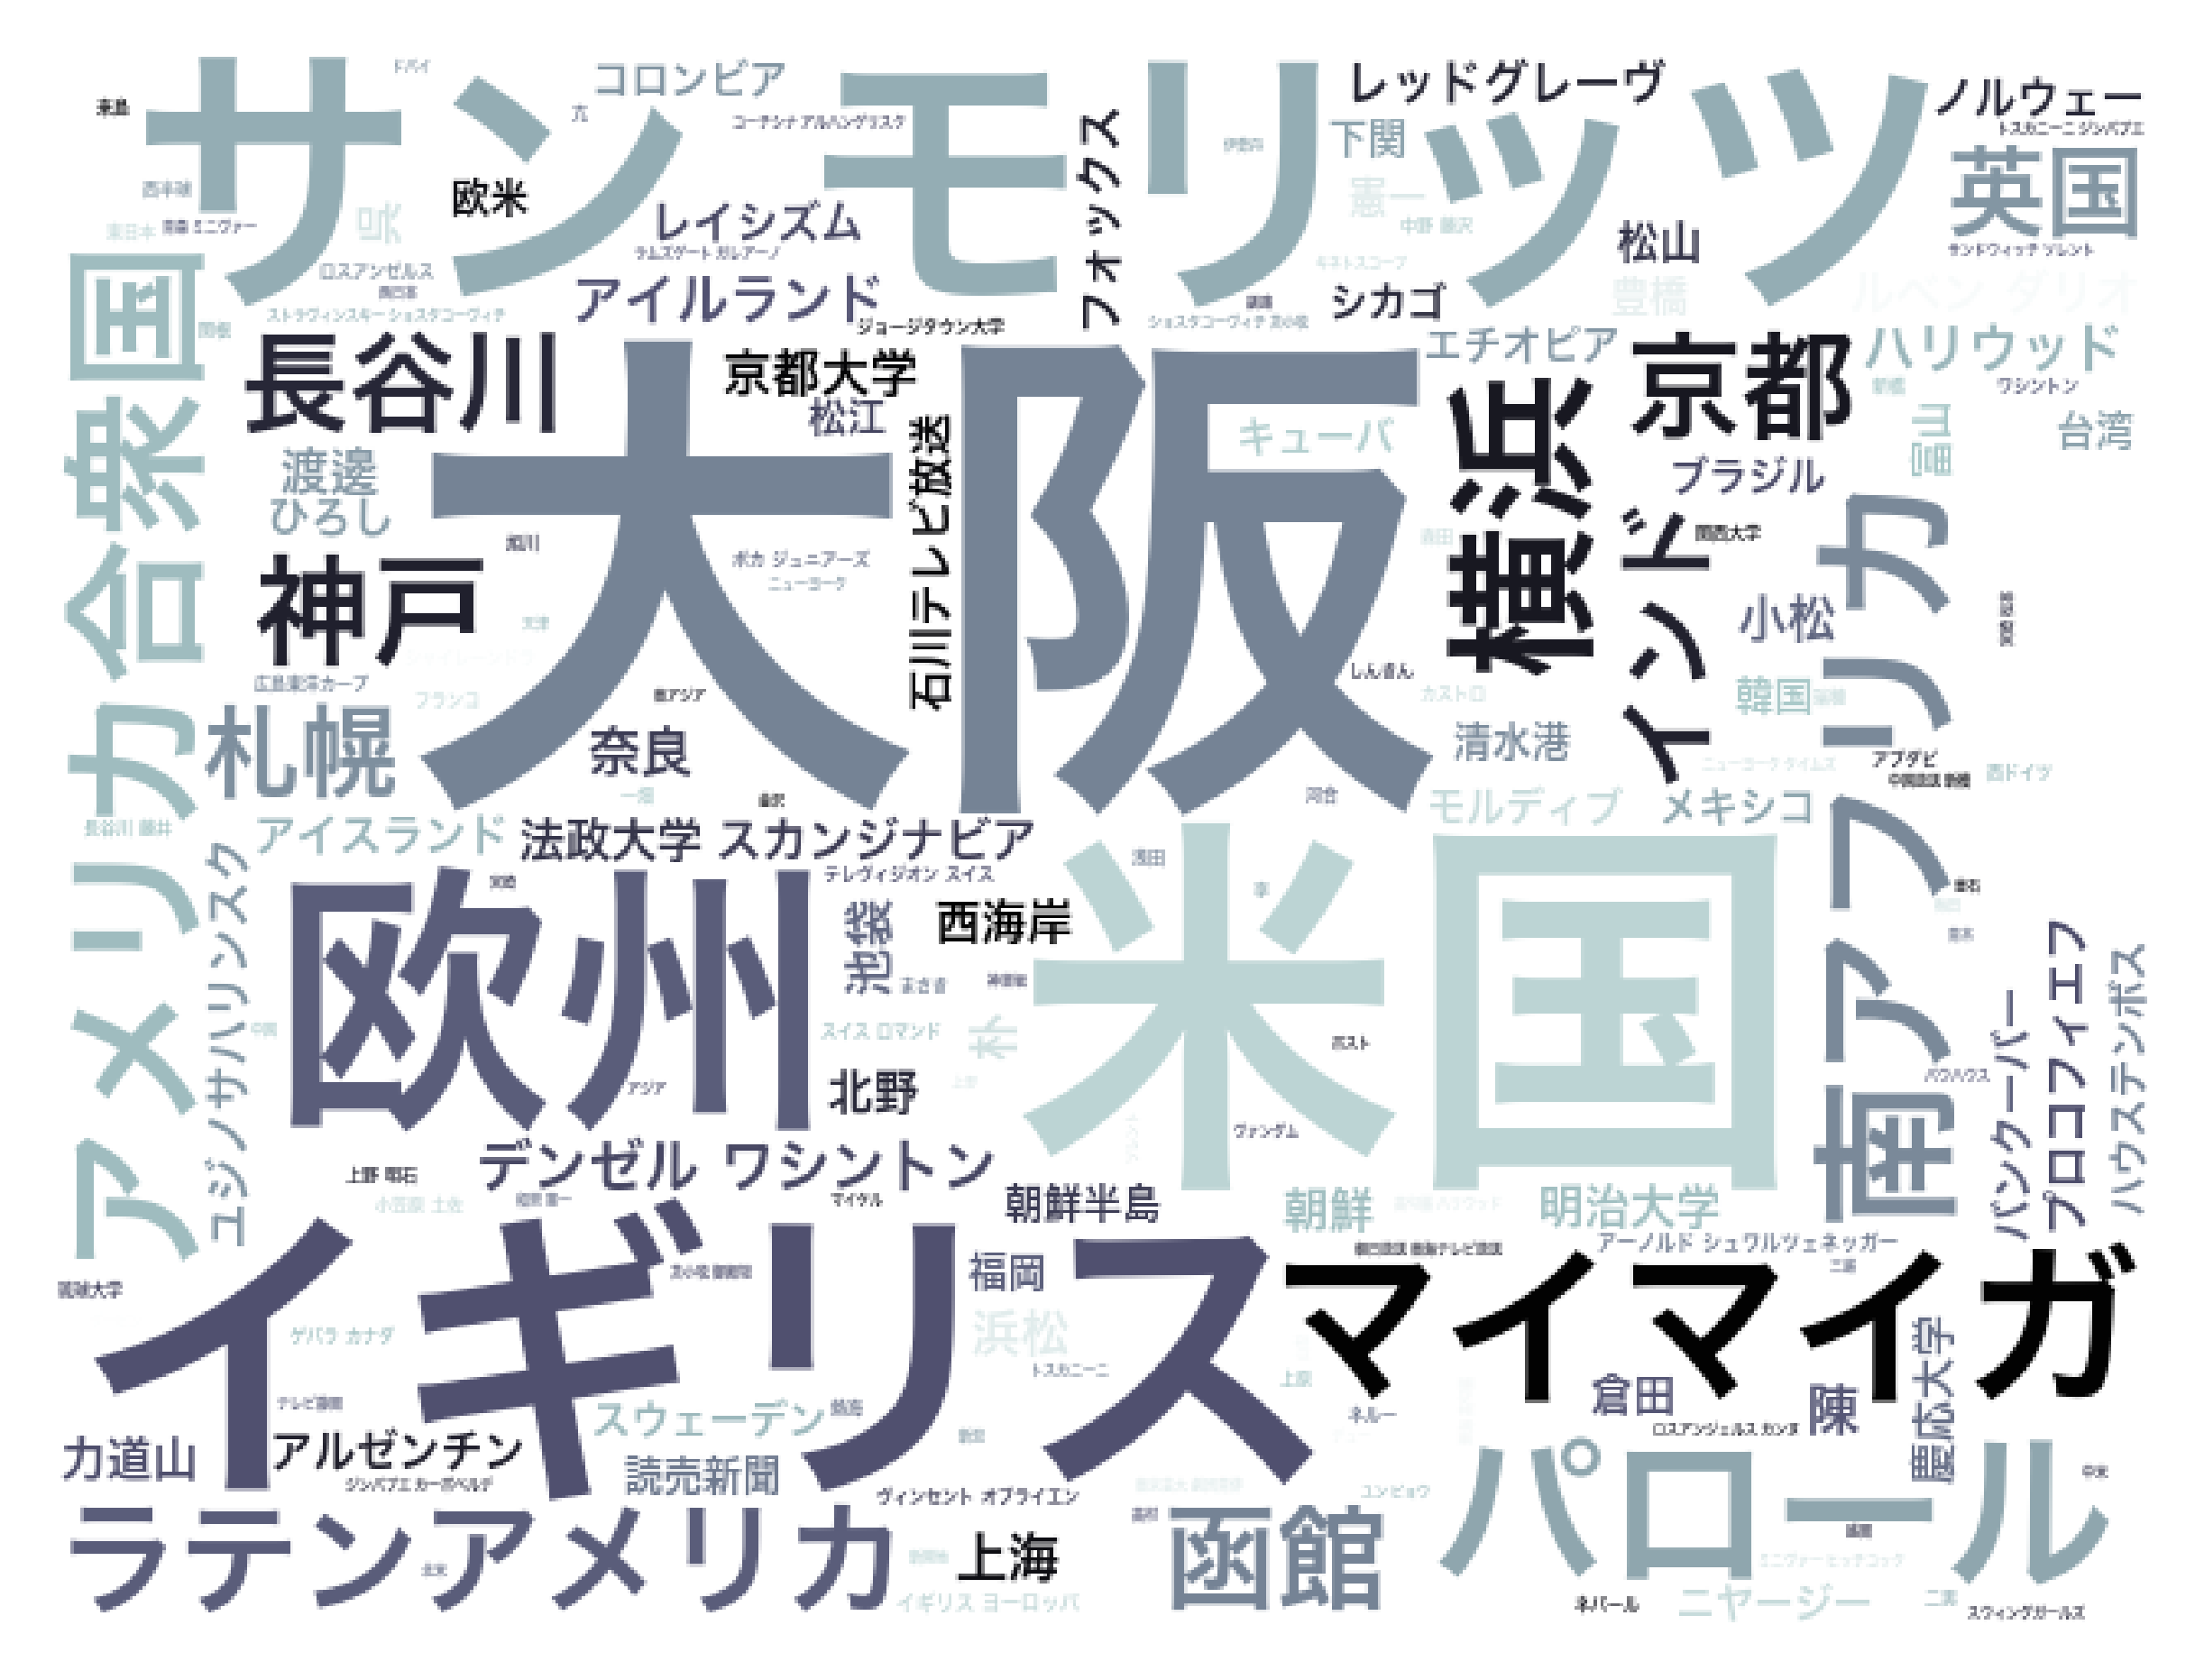

In [153]:
# リストを文字列に変換
word_chain = ' '.join(output_word_list)

font = "/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc"

# ワードクラウド作成
W = WordCloud(width=640, height=480, background_color='white', colormap='bone',font_path =font).generate(word_chain)

plt.figure(figsize=(5,5), dpi=300)
plt.axis("off")
#plt.imshow(W, interpolation="bilinear")
plt.imshow(W)
plt.show()

# 単純なword2vecのmost_similar関数との比較

In [154]:
# 複数の単語で類似度の高いものを上から１０個表示する
most_similar = np.array(list(model.wv.most_similar(['日本', "東京", "アメリカ"], [], 20)))[:,0]
most_similar.tolist()

['米国',
 '香港',
 '海外',
 '韓国',
 'シンガポール',
 '台湾',
 'ブラジル',
 '極東',
 '欧米',
 '英国',
 'ハワイ',
 'オーストラリア',
 'カナダ',
 'Cosmopolitan',
 '音楽産業',
 '世界各国',
 '欧州',
 'アジア地域',
 'ロスアンゼルス',
 'アジア']

In [155]:
values = sorted(c.values(), reverse=True)[:20]

In [156]:
nun_list = []

for i in values:

    keys = [k for k, v in c.items() if v == i]
    nun_list.extend(keys)

In [157]:
set(nun_list)

{'アメリカ合衆国',
 'イギリス',
 'インド',
 'カナダ',
 'サン・モリッツ',
 'デンゼル・ワシントン',
 'ハリウッド',
 'パロール',
 'マイマイガ',
 'ラテンアメリカ',
 '京都',
 '函館',
 '南アフリカ',
 '大阪',
 '札幌',
 '横浜',
 '欧州',
 '神戸',
 '米国',
 '英国',
 '長谷川'}

In [158]:
import numpy as np

def cal_cos_similarity(q, d):
    return np.dot(q, d) / (np.linalg.norm(q) * np.linalg.norm(d))


cal_cos_similarity(model.wv["のび太"], model.wv["鬼塚"])

0.40635827